In [1]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# %%timeit -n 1
# Load your data  -- start with CreditScoring.csv... then Life Expectancy - and then anyone you choose
# Replace with your dataset... for instance - if it is on github -use:  https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv
df = pd.read_csv('./CreditScoring.csv')

In [3]:
len(df)

4455

In [4]:
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [5]:
df.shape

(4455, 14)

In [6]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [7]:
df.corr()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260312,0.051025,0.099935,-0.094498,0.010535,0.278638,0.152722,0.029499,0.059807,0.032989,0.062401,0.153771,0.010297
Seniority,-0.260312,1.000000,-0.145878,-0.021320,0.505787,0.163433,-0.015674,-0.109339,0.125798,-0.034262,0.026380,0.005725,-0.007859,0.040922
Home,0.051025,-0.145878,1.000000,-0.020880,-0.270784,-0.260712,-0.013205,-0.032042,-0.334092,-0.022968,-0.020389,-0.043584,-0.019560,-0.026542
Time,0.099935,-0.021320,-0.020880,1.000000,-0.051966,0.049978,0.028094,-0.138454,-0.001059,-0.020246,-0.039491,-0.051170,0.431050,0.129796
Age,-0.094498,0.505787,-0.270784,-0.051966,1.000000,0.325652,0.060171,0.179447,0.248254,0.010653,0.053084,0.015971,0.028907,0.048739
Marital,0.010535,0.163433,-0.260712,0.049978,0.325652,1.000000,0.082440,0.034105,0.210315,0.004463,-0.007824,0.000985,0.054130,0.062537
Records,0.278638,-0.015674,-0.013205,0.028094,0.060171,0.082440,1.000000,0.033898,0.057329,0.034741,0.004926,0.008197,0.110349,0.085143
Job,0.152722,-0.109339,-0.032042,-0.138454,0.179447,0.034105,0.033898,1.000000,0.024170,0.102801,0.049138,0.029067,0.055833,0.056497
Expenses,0.029499,0.125798,-0.334092,-0.001059,0.248254,0.210315,0.057329,0.024170,1.000000,0.010664,-0.023255,-0.018899,0.048958,0.040162
Income,0.059807,-0.034262,-0.022968,-0.020246,0.010653,0.004463,0.034741,0.102801,0.010664,1.000000,0.092042,0.116399,0.019659,0.023088


In [8]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [10]:
df.head().T

,0,1,2,3,4
status,1,1,2,1,1
seniority,9,17,10,0,0
home,1,1,2,1,1
time,60,60,36,60,36
age,30,58,46,24,26
marital,2,3,2,1,1
records,1,1,2,1,1
job,3,1,3,1,1
expenses,73,48,90,63,46
income,129,131,200,182,107


In [11]:
# Categorical Values will be encoded with the Dictionary Vectorizor
# Numerical Values: At a minimum - clean the missing values and 

In [12]:
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced
# Obviously don't run this with your dataset
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df = df[df.status != 'unk']   # Also make sure to treat the target variable

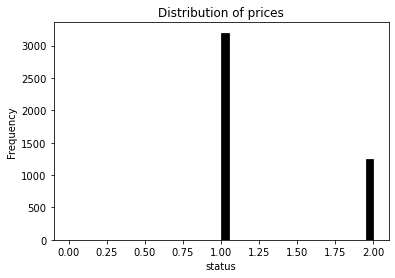

In [13]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Also replace your X label
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('Distribution of prices')

plt.show()

In [14]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129.0,0.0,0.0,800,846
1,1,17,1,60,58,3,1,1,48,131.0,0.0,0.0,1000,1658
2,2,10,2,36,46,2,2,3,90,200.0,3000.0,0.0,2000,2985
3,1,0,1,60,24,1,1,1,63,182.0,2500.0,0.0,900,1325
4,1,0,1,36,26,1,1,1,46,107.0,0.0,0.0,310,910


In [16]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
'''
# Split the data into test, train, validation sets... 60/20/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
# This splits df_train_full again so it is 60/20/20
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
len(df_train), len(df_val), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)
len(df_train),len(df_val),len(df_test)
'''

In [17]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(3564, 891)

In [18]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']


In [19]:
len(y_train),len(y_test)

(3564, 891)

In [20]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [21]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names_out()  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [23]:
X_test.shape

(891, 13)

LR: 0.786198 (0.012232)
Score for each of the 10 K-fold tests:  [0.79271709 0.79271709 0.77871148 0.77030812 0.79494382 0.79213483
 0.7752809  0.81179775 0.78089888 0.77247191]
LogisticRegression(solver='liblinear')
	Training time: 0.142s
	Prediction time: 1.422s

LDA: 0.778351 (0.015439)
Score for each of the 10 K-fold tests:  [0.78151261 0.77871148 0.76470588 0.74509804 0.80337079 0.79213483
 0.77808989 0.78651685 0.76685393 0.78651685]
LinearDiscriminantAnalysis()
	Training time: 1.066s
	Prediction time: 1.349s

KNN: 0.721115 (0.019672)
Score for each of the 10 K-fold tests:  [0.70308123 0.71708683 0.72829132 0.68347339 0.71067416 0.75280899
 0.74157303 0.73876404 0.70786517 0.72752809]
KNeighborsClassifier()
	Training time: 0.006s
	Prediction time: 0.314s

CART: 0.711010 (0.017333)
Score for each of the 10 K-fold tests:  [0.68907563 0.69747899 0.72268908 0.69467787 0.75280899 0.70505618
 0.72191011 0.71067416 0.70505618 0.71067416]
DecisionTreeClassifier()
	Training time: 0.018s
	P

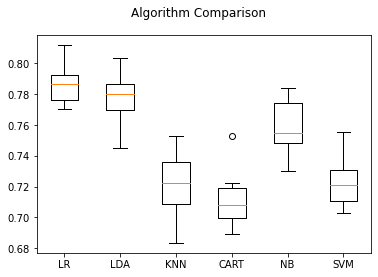

In [24]:
# Compare Algorithms
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Once you identify a single model or two - begin to investigate

In [25]:
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
type(X_train)
type(dv.get_feature_names_out())
type(dt.feature_importances_)

numpy.ndarray

In [28]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
from sklearn.tree import export_text 
 
tree_text = export_text(dt, feature_names=dv.feature_names_) 
print(tree_text)

In [29]:
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.100 age
0.114 amount
0.081 assets
0.025 debt
0.060 expenses
0.039 home
0.150 income
0.048 job
0.019 marital
0.131 price
0.085 records
0.108 seniority
0.041 time


In [56]:
from sklearn.metrics import f1_score
y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = y_pred.astype('int')
f1_score(y_test, y_pred, average=None)

array([0.       , 0.8031746, 0.       ])

In [57]:
y_pred.dtype

dtype('int64')

In [59]:
# https://github.com/sepandhaghighi/pycm
!pip install pycm
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=y_pred)
# cm = ConfusionMatrix(y_actu, y_pred, classes=[1,0,4])
print(cm)

Predict   0         1         2         
Actual
0         0         0         0         

1         116       506       0         

2         137       132       0         





Overall Statistics : 

95% CI                                                            (0.53537,0.60043)
ACC Macro                                                         0.71193
ARI                                                               0.17162
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.64519
Bennett S                                                         0.35185
CBA                                                               0.26437
CSI                                                               None
Chi-Squared                                                       None
Chi-Squared DF                                               

In [60]:
type(y_test)

numpy.ndarray

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#[[1 1 3]
# [3 2 2]
# [1 3 1]]

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
# print(FP)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/((TP+FN)+.01)
# Specificity or true negative rate
TNR = TN/((TN+FP)+.01)
# Precision or positive predictive value
PPV = TP/((TP+FP)+.01)
# Negative predictive value
NPV = TN/((TN+FN)+.01)
# Fall out or false positive rate
FPR = FP/((FP+TN)+.01)
# False negative rate
FNR = FN/((TP+FN)+.01)
# False discovery rate
FDR = FP/((TP+FP)+.01)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


[[  0   0   0]
 [116 506   0]
 [137 132   0]]


The AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems by using the One vs All technique(calculating auc-roc curve considering each label at a time and all the other can be grouped as one  label)

In [68]:
from sklearn.metrics import classification_report
print("For classification report:")
print(classification_report(y_test , y_pred))

from sklearn.metrics import confusion_matrix
print("For confusion matrix")
print(confusion_matrix(y_test , y_pred))

For classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.79      0.81      0.80       622
         2.0       0.00      0.00      0.00       269

    accuracy                           0.57       891
   macro avg       0.26      0.27      0.27       891
weighted avg       0.55      0.57      0.56       891

For confusion matrix
[[  0   0   0]
 [116 506   0]
 [137 132   0]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/pyth

In [73]:
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))



The first 10 prediction [1 2 1 1 1 1 1 1 2 1]
The real first 10 labels [1 2 1 1 2 1 1 2 1 1]


In [74]:
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [75]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert any record into a dictionary
df_train_full.iloc[[21]]

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3576,17,1,60,52,2,1,1,65,200.0,0.0,0.0,1400,1407


In [76]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'seniority': 7,
 'home': 3,
 'time': 36,
 'age': 24,
 'marital': 1,
 'records': 1,
 'job': 3,
 'expenses': 35,
 'income': 131.0,
 'assets': 7500.0,
 'debt': 0.0,
 'amount': 1350,
 'price': 1406}

In [77]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'seniority': 6,
 'home': 6,
 'time': 30,
 'age': 22,
 'marital': 1,
 'records': 1,
 'job': 1,
 'expenses': 35,
 'income': 73.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 1086,
 'price': 1086}

In [78]:
#car = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [82]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [83]:
model_prediction(item,dv,dt)

1

In [84]:
actual

array([1])

In [86]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Hyperparameter Tuning

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [94]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters

DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)

In [102]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [106]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [107]:
# You can change the params by editing the output of this and repeating the above steps.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [108]:
#Many parameters will take a very long time to load
param = { 'max_depth': [2,3,5,20,40], 
         'max_leaf_nodes': [2,20,200]}

In [111]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [113]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(dt, param, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [114]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7789076679360885
Best Hyperparameters: {'max_depth': 20, 'max_leaf_nodes': 20}
